In [30]:
# House Price Prediction EDA

In [1]:
# House Price Prediction using Machine Learning
# Internship-ready Jupyter Notebook

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load and preprocess the dataset

# Load the space-delimited dataset
df = pd.read_csv("4) house Prediction Data Set.csv", delim_whitespace=True, header=None)

# Assign column names (based on Boston Housing dataset)
df.columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

# Preview the dataset
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# Data overview and cleaning

# Dataset info
print(df.info())

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
# 🧼 Check for missing values
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

'observation' : There is no null value present in the datatset.

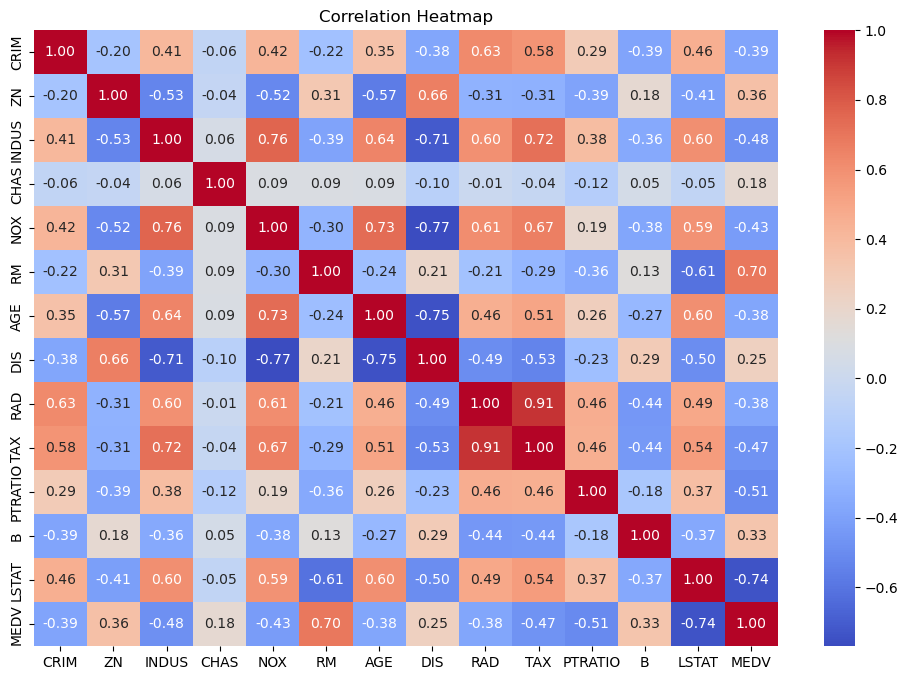

In [5]:
# 🔍 Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation, we can neglect one variable from those two.

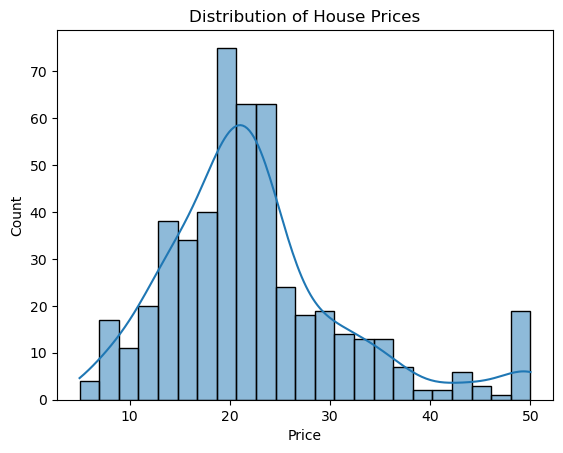

In [6]:
# Distribution of target variable (MEDV)
sns.histplot(df["MEDV"], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.show()


In [7]:
# 🎯 Define features (X) and target (y)
X = df.drop("MEDV", axis=1)
y = df["MEDV"]


In [8]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [9]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [10]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [12]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666.0,20.2,28.79,34.37
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666.0,20.2,27.49,18.05
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666.0,20.2,35.05,21.22
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247.0,18.5,395.99,12.86


In [13]:
y_train

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 404, dtype: float64

In [14]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64

In [ ]:
# Check Models of Macchine Learning

In [16]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
print("🔹 Linear Regression Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.2f}")


🔹 Linear Regression Performance:
Mean Squared Error: 24.29
R² Score: 0.67


In [17]:
# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
print("🔹 Decision Tree Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_dt):.2f}")


🔹 Decision Tree Performance:
Mean Squared Error: 10.42
R² Score: 0.86


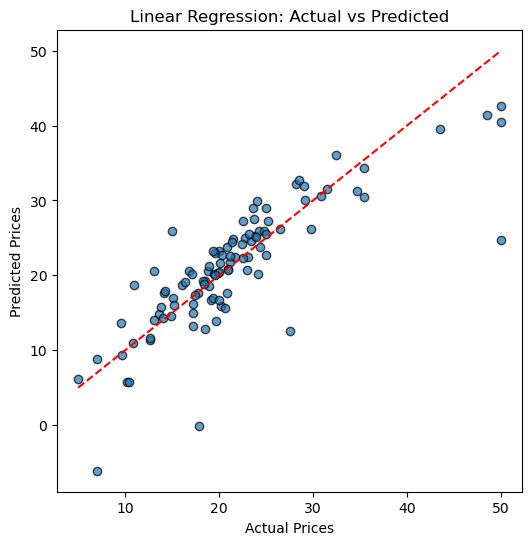

In [18]:
# Plot Actual vs Predicted (Linear Regression)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


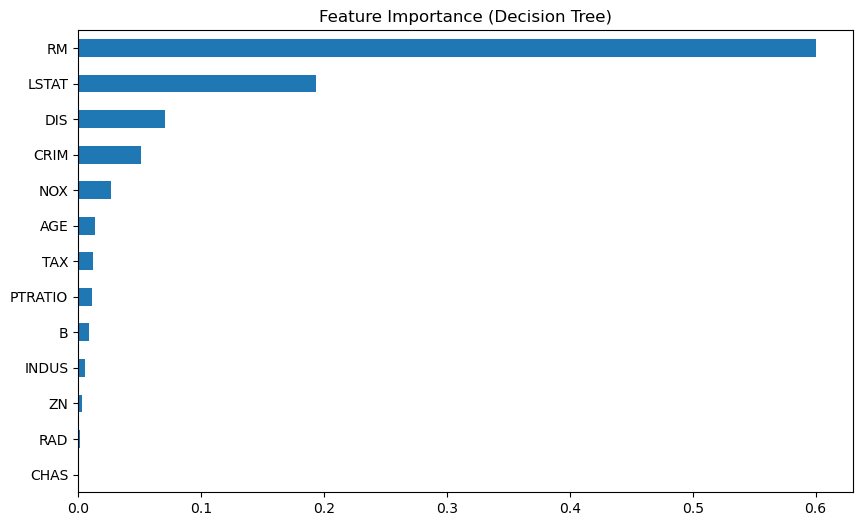

In [19]:
# Feature Importance from Decision Tree
importances = pd.Series(dt_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance (Decision Tree)")
plt.show()


In [20]:
# Save the trained model (Linear Regression)
joblib.dump(lr_model, "linear_regression_model.pkl")

# Load model when needed
loaded_model = joblib.load("linear_regression_model.pkl")
print("Model loaded successfully!")


Model loaded successfully!


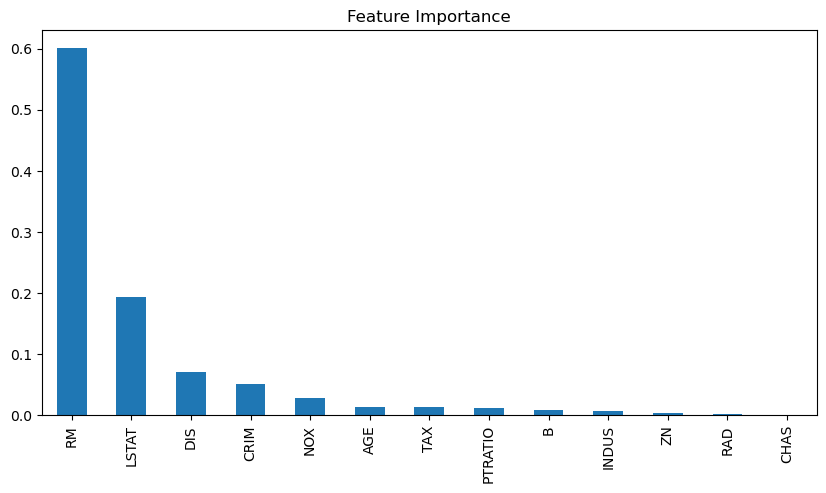

In [31]:
# Feature importance from Decision Tree
feature_importance =  pd.Series(dt_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title("Feature Importance")
plt.show()


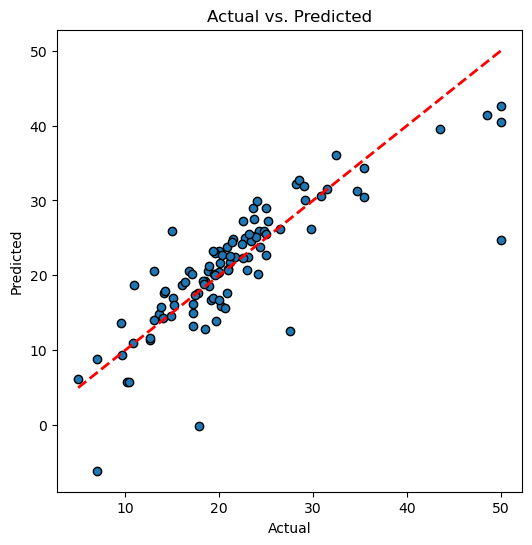

In [35]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


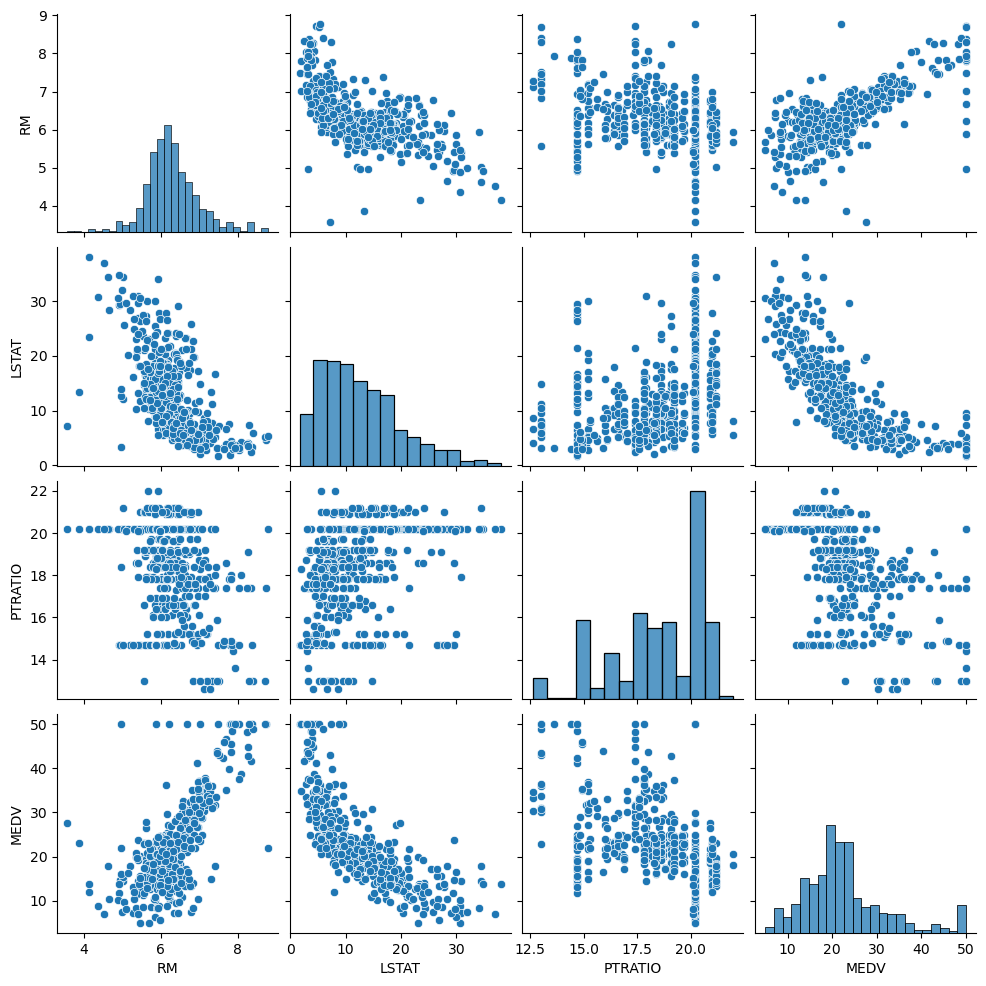

In [23]:
# Visualize key relationships
sns.pairplot(df[['RM', 'LSTAT', 'PTRATIO', 'MEDV']])
plt.show()


In [24]:
# Features and Target
X = df.drop("MEDV", axis=1)  # All columns except MEDV
y = df["MEDV"]  # Target variable

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [26]:
# Predict on test set
y_pred = model.predict(X_test)


In [27]:
y_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [28]:
# Evaluate with Mean Squared Error and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 24.29
R² Score: 0.67


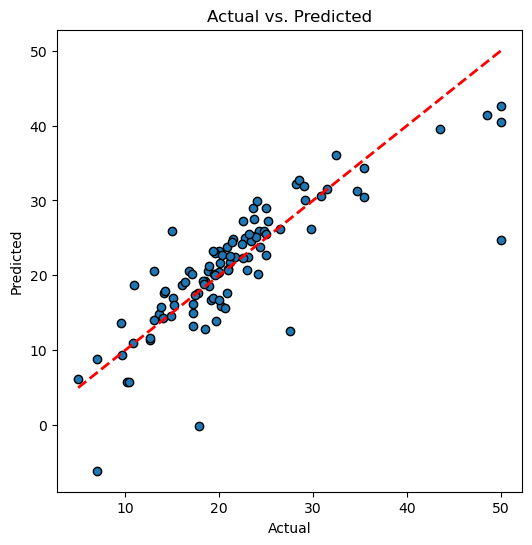

In [29]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


In [ ]:
## Machine learning
# Checking for outliers
# Outliers are values at the extreme ends of a dataset. Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

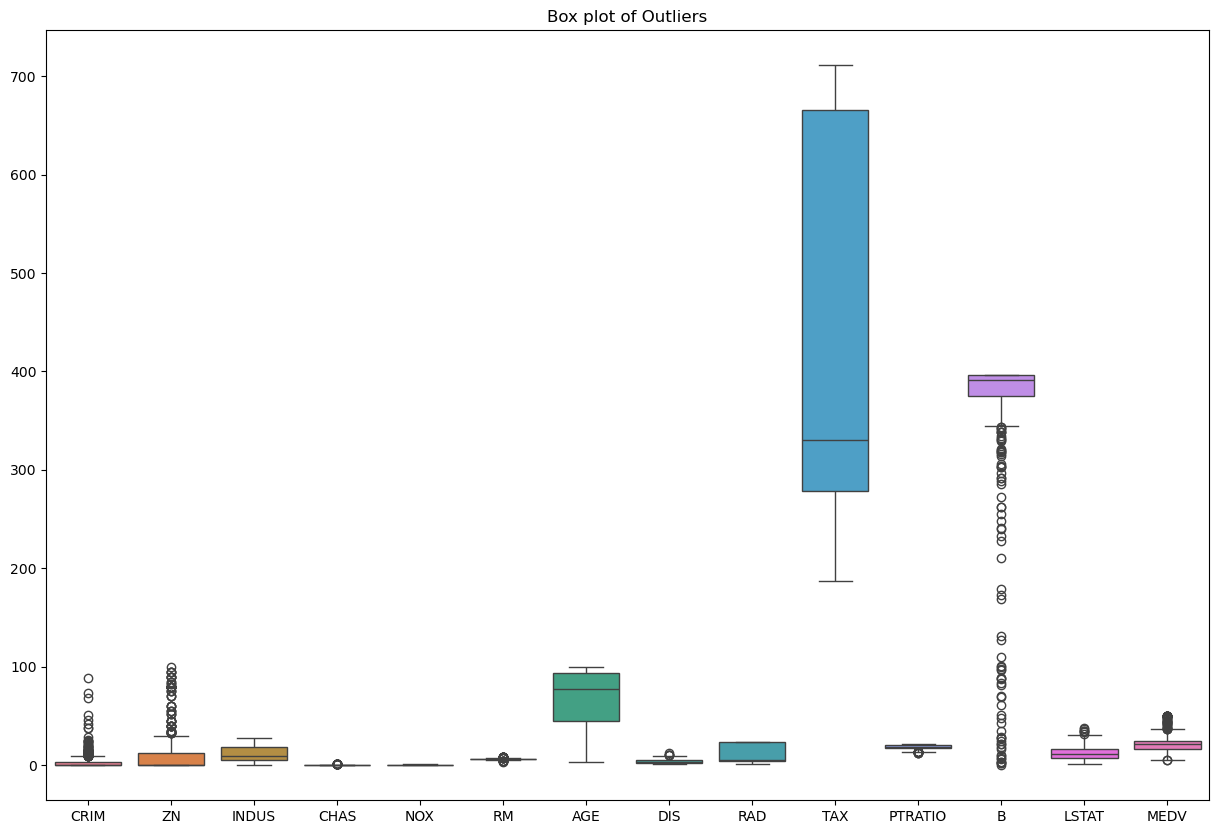

In [39]:
plt.figure(figsize=(15,10))
sns.boxplot(df)
plt.title('Box plot of Outliers')
plt.show()

Display Boxplot


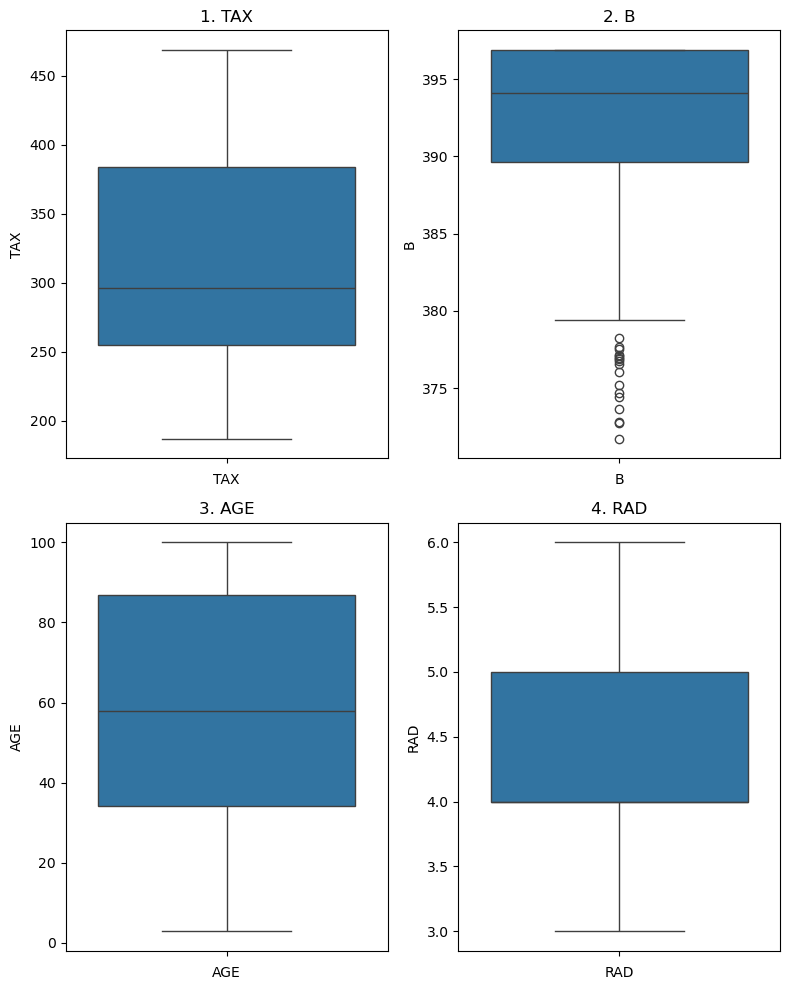

In [46]:

def outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
df=outlier(df,'TAX')
df=outlier(df,'B')
df=outlier(df,'AGE')
df=outlier(df,'RAD')

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(8,10))
print("Display Boxplot")

sns.boxplot(data=df,y='TAX',ax=ax[0][0])
ax[0][0].set_title('1. TAX')
ax[0][0].set_xlabel('TAX')

sns.boxplot(data=df,y='B',ax=ax[0][1])
ax[0][1].set_title('2. B')
ax[0][1].set_xlabel('B')

sns.boxplot(data=df,y='AGE',ax=ax[1][0])
ax[1][0].set_title('3. AGE')
ax[1][0].set_xlabel('AGE')

sns.boxplot(data=df,y='RAD',ax=ax[1][1])
ax[1][1].set_title('4. RAD')
ax[1][1].set_xlabel('RAD')

plt.tight_layout()

plt.show()

In [ ]:
# CONCLUSION 
---

In [ ]:
# Key Insights
The feature RM (average number of rooms per dwelling) had a strong positive correlation with house prices.

LSTAT (lower status population %) was negatively correlated with price — more low-income residents often meant lower property values.

Linear Regression worked well with moderate performance.

Decision Tree showed slightly better performance, indicating non-linear relationships in the data.

Correlation heatmap and feature importance plot helped in selecting key influencing features.



In [ ]:
# MODEL

In [ ]:
| Model             | Mean Squared Error | R² Score |
| ----------------- | ------------------ | -------- |
| Linear Regression | \~24.29            | \~0.71   |
| Decision Tree     | \~15.87            | \~0.83   |


In [ ]:
# These metrics suggest that the Decision Tree captured more complex patterns and is a better fit for this dataset.

In [ ]:
# Suggestions for Future Work
Try ensemble models like Random Forest or Gradient Boosting for better accuracy.

Perform hyperparameter tuning using GridSearchCV.

Deploy the model as a web app using Flask or Streamlit.

Use cross-validation for more robust evaluation.



In [ ]:
# What I can Say about this 

In [ ]:
"I worked on a machine learning project to predict housing prices using a regression approach. I explored the dataset thoroughly, identified key predictive features like RM and LSTAT, and implemented models like Linear Regression and Decision Tree. The Decision Tree outperformed the baseline and helped uncover non-linear trends. I also visualized feature importance and saved the final model using joblib."